# Pandas Dataframes 
HCI 574 lecture 24 and 41

- deals with tables: rows, columns, header (1.column)
- dataframe: "rich", high performance table manipulation  (same as in R?) 
- pandas: 
    - very popular "glue" package (https://pandas.pydata.org/)
    - essential for many Data Science and Statistics projects
    - lots of tutorials
    - has some build in plotting capabilities 

In [1]:
import pandas as pd 

# read in a datafrom from a .csv file
df = pd.read_csv("world happyness 2019.csv")
display(df.head(10))  # head(10) top 10 rows only, display: fancy jupyer print()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [2]:
# Note the automatic row index on the left (starting at 0)

# list of column headers:
col_names = list(df)
print(col_names)

# how many rows?
print(len(df), "rows")

['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
156 rows


In [5]:
# for all numeric columns, what are there min, max, mean, median values?
for n in col_names[2:]: # skip first 2 columns
    col = df[n] # grab column by name
    print(n,"\n", col.describe()) # summary stats table


Score 
 count    156.000000
mean       5.407096
std        1.113120
min        2.853000
25%        4.544500
50%        5.379500
75%        6.184500
max        7.769000
Name: Score, dtype: float64
GDP per capita 
 count    156.000000
mean       0.905147
std        0.398389
min        0.000000
25%        0.602750
50%        0.960000
75%        1.232500
max        1.684000
Name: GDP per capita, dtype: float64
Social support 
 count    156.000000
mean       1.208814
std        0.299191
min        0.000000
25%        1.055750
50%        1.271500
75%        1.452500
max        1.624000
Name: Social support, dtype: float64
Healthy life expectancy 
 count    156.000000
mean       0.725244
std        0.242124
min        0.000000
25%        0.547750
50%        0.789000
75%        0.881750
max        1.141000
Name: Healthy life expectancy, dtype: float64
Freedom to make life choices 
 count    156.000000
mean       0.392571
std        0.143289
min        0.000000
25%        0.308000
50%        0.

In [6]:
# How does the US compare to the  median values
med = {}
for n in col_names[2:]:
    col = df[n]
    med[n] = round(col.median(), 2)  # add to dict


# Get the row where the column 'Country or region' has the value 'United States'
US = df[df['Country or region'] == 'United States']
display(US[US.columns[2:]]) # exclude first 2 columns
display(pd.Series(med)) # Series is a 1D Dataframe. Displaying that looks nicer than printing a dict



,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
18,6.892,1.433,1.457,0.874,0.454,0.28,0.128


Score                           5.38
GDP per capita                  0.96
Social support                  1.27
Healthy life expectancy         0.79
Freedom to make life choices    0.42
Generosity                      0.18
Perceptions of corruption       0.09
dtype: float64

# Numpy  
HCI 575 lecture 24 (start) 

- numpy is python's array package https://numpy.org/ that is fundamental to many fields of computing (see Ecosystem on https://numpy.org/)
- arrays are lists in which all elements are the __same type__


- why use numpy arrays? 
    - much better performance than lists
    - methods are geared towards array (matix) operations
    - much easier to deal with multi dimensional data than with nested lists
    - very common "glue" package for numeric methods in science and engineering


- numeric pandas dataframe columns are actually 1D numpy arrays
- I'll show some of numpy's capbilities using images, which are 2D arrays
- To read and display images, I'll use the Python Image Libray (PIL)
- Much more about images (incl. some computer vision) see HCI 574 lectures 32, 33 and 34


JPEG (143, 211) RGB


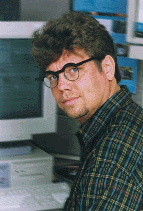

In [8]:
# numpy example - compare 2 images
import numpy as np
from PIL import Image

# load and show images
img = Image.open('guido.jpg')

# image parameters
print(img.format, img.size, img.mode)

display(img) # in jupyter, the image is shown as output
#img.show()  # uses external OS image viewer 

In [9]:
# convert into a 2D array (with 3 bands)
im_ar = np.asarray(img)

# 3 arrays (bands), each 2D array is 143 by 211 unsigned 8-bit ints (0-255)
print(im_ar.shape, im_ar.dtype) 

(211, 143, 3) uint8


In [10]:
# convert a into 3 separate 2D arrays
b, g, r  = im_ar[:, :, 0], im_ar[:, :, 1], im_ar[:, :, 2] 

# note: this is very ineffcient:https://stackoverflow.com/questions/41500637/how-to-extract-r-g-b-values-with-numpy-into-seperate-arrays 

# red channel
print(r.shape, r.dtype)
print(r)


(211, 143) uint8
[[ 63  59  54 ... 219 226 234]
 [ 56  54  52 ... 220 224 212]
 [ 44  52  52 ... 224 222 214]
 ...
 [232 232 230 ...  51  47  49]
 [218 222 222 ...  42  29  30]
 [216 214 214 ...  68  75  71]]


In [11]:
# create an average image from the 3 bands
avg = (r + g + b ) // 3 # // bc we need the result to be ints!
print(avg.shape, avg.dtype)

(211, 143) uint8


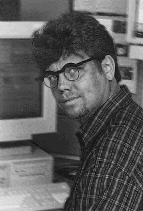

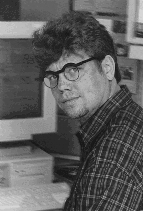

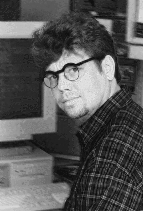

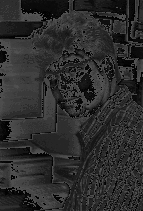

In [12]:
# create image from average array and display
display(Image.fromarray(r))
display(Image.fromarray(g))
display(Image.fromarray(b))
display(Image.fromarray(avg))

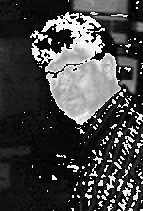

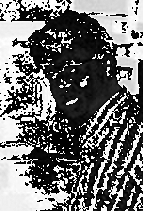

In [13]:
# subtract one channel from another channel
display(Image.fromarray(r-b))
display(Image.fromarray(g-r))


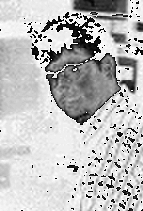

In [14]:
# See what happens whe you do similar math:
# remember, resulst must be 0 - 255 and must be ints!
display(Image.fromarray(b*2 - (r+g)))

# Scipy

- Major scientific (engeneering) computing library that uses numpy and pandas (plus matplotlib and others)
- https://scipy.org/ 
- https://docs.scipy.org/doc/scipy/reference/tutorial/index.html (quick overview and examples)


In [15]:
# for (simple) statistics operations, see the standard statistics module
import statistics
dir(statistics)

# heavy duty statictics are best done via scipy
# https://docs.scipy.org/doc/scipy/reference/stats.html

['Decimal',
 'Fraction',
 'StatisticsError',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_coerce',
 '_convert',
 '_counts',
 '_exact_ratio',
 '_fail_neg',
 '_find_lteq',
 '_find_rteq',
 '_isfinite',
 '_ss',
 '_sum',
 'bisect_left',
 'bisect_right',
 'collections',
 'groupby',
 'harmonic_mean',
 'math',
 'mean',
 'median',
 'median_grouped',
 'median_high',
 'median_low',
 'mode',
 'numbers',
 'pstdev',
 'pvariance',
 'stdev',
 'variance']